<a href="https://colab.research.google.com/github/Yash-2001-code/survival-analysis/blob/main/Survival_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = '/content/PancreaticCancerData.csv'
data = pd.read_csv(df)

In [ ]:
data.head()

,Case,Dx.Age,Dx.Date,Dx.SzPrim.cm,Dx.WasPrimExcis,Dx.SzMetsLargest.cm,Dx.SzMetsRange.cm,RPP.remark,RPP.Date,RPP.SzPanc.cm,...,Aut.Panc,Aut.SzReTumorPanc,Aut.SzPrim.cm,Aut.MetsBurden,Aut.MeanSzMets.cm,Aut.SzMetsRange.cm,Aut.minSzMetsRange.cm,Aut.maxSzMetsRange.cm,timeline,result
0,1,84,05-05-1995,6.0,No,NaN,x,no data,NaN,NaN,...,Present (Not Resected),NaN,6.0,000to10,1.0,0.5-2.8,0.5,2.8,174,1
1,2,62,16-12-2002,3.0,No,2.0,01-Feb,Yes,27-01-2003,7.0,...,Present (Not Resected),NaN,4.0,100sto1000s,0.3,0.2-2,0.2,2.0,161,1
2,3,67,25-07-2002,2.0,No,2.0,01-Feb,Yes,12-05-2003,4.0,...,Present (Not Resected),NaN,4.0,011to100,3.0,1.0-5.0,1.0,5.0,334,1
3,5,47,02-12-2002,5.0,No,NaN,x,No,NaN,NaN,...,Present (Not Resected),NaN,5.0,000to10,NaN,NaN,NaN,NaN,256,1
4,6,57,15-01-2003,4.0,No,1.0,0.3-1,No,NaN,NaN,...,Present (Not Resected),NaN,5.0,100sto1000s,0.5,0.2-2.0,0.2,2.0,229,1


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 27 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Case                   101 non-null    int64  
 1   Dx.Age                 101 non-null    int64  
 2   Dx.Date                101 non-null    object 
 3   Dx.SzPrim.cm           101 non-null    float64
 4   Dx.WasPrimExcis        101 non-null    object 
 5   Dx.SzMetsLargest.cm    36 non-null     float64
 6   Dx.SzMetsRange.cm      100 non-null    object 
 7   RPP.remark             101 non-null    object 
 8   RPP.Date               44 non-null     object 
 9   RPP.SzPanc.cm          40 non-null     float64
 10  MR.remark              97 non-null     object 
 11  MR.Date                44 non-null     object 
 12  MR.SzMetsLargest.cm    41 non-null     float64
 13  MP.remark              97 non-null     object 
 14  MP.Date                26 non-null     object 
 15  MP.SzM

In [ ]:
data.drop(['RPP.Date'], axis = 1, inplace = True )
data.drop(['MR.Date'], axis = 1, inplace = True )
data.drop(['MP.Date'], axis = 1, inplace = True )
data.drop(['Dx.SzMetsRange.cm'], axis = 1,inplace = True )
data.drop(['MR.remark'], axis = 1, inplace = True )
data.drop(['Aut.SzReTumorPanc'], axis = 1, inplace = True )
data.drop(['MP.remark'], axis = 1, inplace = True )
data.drop(['Aut.MetsBurden'], axis = 1, inplace = True )
data.drop(['Aut.SzMetsRange.cm'], axis = 1, inplace = True )
data.drop(['Case'], axis = 1, inplace = True )

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 17 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Dx.Age                 101 non-null    int64  
 1   Dx.Date                101 non-null    object 
 2   Dx.SzPrim.cm           101 non-null    float64
 3   Dx.WasPrimExcis        101 non-null    object 
 4   Dx.SzMetsLargest.cm    36 non-null     float64
 5   RPP.remark             101 non-null    object 
 6   RPP.SzPanc.cm          40 non-null     float64
 7   MR.SzMetsLargest.cm    41 non-null     float64
 8   MP.SzMetsLargest.cm    26 non-null     float64
 9   Aut.DateDeath          101 non-null    object 
 10  Aut.Panc               101 non-null    object 
 11  Aut.SzPrim.cm          75 non-null     float64
 12  Aut.MeanSzMets.cm      84 non-null     float64
 13  Aut.minSzMetsRange.cm  83 non-null     float64
 14  Aut.maxSzMetsRange.cm  83 non-null     float64
 15  timeli

In [ ]:
data['Dx.Date'] = pd.to_datetime(data['Dx.Date']) 
data['Aut.DateDeath'] = pd.to_datetime(data['Aut.DateDeath'])

In [ ]:
DataDummies = pd.get_dummies(data)
DataDummies

,Dx.Age,Dx.Date,Dx.SzPrim.cm,Dx.SzMetsLargest.cm,RPP.SzPanc.cm,MR.SzMetsLargest.cm,MP.SzMetsLargest.cm,Aut.DateDeath,Aut.SzPrim.cm,Aut.MeanSzMets.cm,...,Dx.WasPrimExcis_No,Dx.WasPrimExcis_Yes,RPP.remark_No,RPP.remark_Yes,RPP.remark_no data,Aut.Panc_Absent (Resected),Aut.Panc_Absent (Treated),Aut.Panc_Present (Not Resected),Aut.Panc_Recurred After Surgery,Aut.Panc_Resected (Total Pancreatectomy)
0,84,1995-05-05,6.0,NaN,NaN,NaN,NaN,1995-10-26,6.0,1.0,...,1,0,0,0,1,0,0,1,0,0
1,62,2002-12-16,3.0,2.0,7.0,5.0,NaN,2003-05-26,4.0,0.3,...,1,0,0,1,0,0,0,1,0,0
2,67,2002-07-25,2.0,2.0,4.0,2.9,5.0,2003-06-24,4.0,3.0,...,1,0,0,1,0,0,0,1,0,0
3,47,2002-02-12,5.0,NaN,NaN,NaN,NaN,2003-08-15,5.0,NaN,...,1,0,1,0,0,0,0,1,0,0
4,57,2003-01-15,4.0,1.0,NaN,NaN,2.0,2003-01-09,5.0,0.5,...,1,0,1,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,74,2010-07-26,2.0,13.6,NaN,NaN,14.0,2010-10-23,3.0,5.0,...,1,0,1,0,0,0,0,1,0,0
97,69,2010-11-11,3.0,2.5,NaN,NaN,NaN,2010-11-28,3.0,2.5,...,1,0,1,0,0,0,0,1,0,0
98,75,2010-01-04,3.0,NaN,3.0,NaN,NaN,2010-12-14,3.5,NaN,...,1,0,1,0,0,0,0,1,0,0
99,55,2009-01-09,1.6,NaN,2.6,NaN,NaN,2010-12-22,3.5,1.5,...,1,0,0,1,0,0,0,1,0,0


In [ ]:
DataDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Dx.Age                                    101 non-null    int64         
 1   Dx.Date                                   101 non-null    datetime64[ns]
 2   Dx.SzPrim.cm                              101 non-null    float64       
 3   Dx.SzMetsLargest.cm                       36 non-null     float64       
 4   RPP.SzPanc.cm                             40 non-null     float64       
 5   MR.SzMetsLargest.cm                       41 non-null     float64       
 6   MP.SzMetsLargest.cm                       26 non-null     float64       
 7   Aut.DateDeath                             101 non-null    datetime64[ns]
 8   Aut.SzPrim.cm                             75 non-null     float64       
 9   Aut.MeanSzMets.cm               

In [ ]:
(DataDummies.iloc[:,4]).values.reshape(1,-1)

array([[ nan,  7. ,  4. ,  nan,  nan,  nan,  nan,  nan,  nan,  nan,  7. ,
         nan,  4.6,  nan,  1.7,  nan,  nan,  nan,  3.5,  3. ,  nan,  3.8,
         nan,  4.4,  nan,  nan, 11. ,  6.5,  5. ,  nan,  nan,  nan,  6.1,
         nan,  nan,  nan,  nan,  4.7,  nan,  1. ,  2. ,  nan,  nan,  1.6,
         nan,  nan,  nan,  nan,  3.3,  nan,  nan,  5.3,  5.1,  nan,  nan,
         nan,  nan,  nan,  4.5,  nan,  nan,  nan,  nan,  2. ,  nan,  3. ,
         nan,  nan,  5.1,  nan,  1.7,  nan,  3.8,  3.2,  nan,  nan,  nan,
         nan,  2.9,  nan,  nan,  nan,  nan,  nan,  4.5,  5.5,  4.5,  2.3,
         2.3,  2. ,  nan,  3.3,  2.8,  nan,  1.8,  3.1,  nan,  nan,  3. ,
         2.6,  nan]])

In [ ]:
import sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(DataDummies.iloc[:,-4:])
imputer.transform(DataDummies.iloc[:,-4:])

array([[0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],


In [ ]:
import sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(DataDummies.iloc[:,3:7])
DataDummies.iloc[:,3:7] = imputer.transform(DataDummies.iloc[:,3:7])

In [ ]:
import sklearn
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy = 'mean')
imputer.fit(DataDummies.iloc[:,8:12])
DataDummies.iloc[:,8:12] = imputer.transform(DataDummies.iloc[:,8:12])

In [ ]:
DataDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 24 columns):
 #   Column                                    Non-Null Count  Dtype         
---  ------                                    --------------  -----         
 0   Dx.Age                                    101 non-null    int64         
 1   Dx.Date                                   101 non-null    datetime64[ns]
 2   Dx.SzPrim.cm                              101 non-null    float64       
 3   Dx.SzMetsLargest.cm                       101 non-null    float64       
 4   RPP.SzPanc.cm                             101 non-null    float64       
 5   MR.SzMetsLargest.cm                       101 non-null    float64       
 6   MP.SzMetsLargest.cm                       101 non-null    float64       
 7   Aut.DateDeath                             101 non-null    datetime64[ns]
 8   Aut.SzPrim.cm                             101 non-null    float64       
 9   Aut.MeanSzMets.cm               

In [ ]:
DataDummies.drop(['Dx.Date'], axis = 1, inplace = True )
DataDummies.drop(['Aut.DateDeath'], axis = 1, inplace = True )


In [ ]:
DataDummies.head()

,Dx.Age,Dx.SzPrim.cm,Dx.SzMetsLargest.cm,RPP.SzPanc.cm,MR.SzMetsLargest.cm,MP.SzMetsLargest.cm,Aut.SzPrim.cm,Aut.MeanSzMets.cm,Aut.minSzMetsRange.cm,Aut.maxSzMetsRange.cm,...,Dx.WasPrimExcis_No,Dx.WasPrimExcis_Yes,RPP.remark_No,RPP.remark_Yes,RPP.remark_no data,Aut.Panc_Absent (Resected),Aut.Panc_Absent (Treated),Aut.Panc_Present (Not Resected),Aut.Panc_Recurred After Surgery,Aut.Panc_Resected (Total Pancreatectomy)
0,84,6.0,2.458333,3.8625,1.826098,3.726923,6.0,1.000000,0.500000,2.800000,...,1,0,0,0,1,0,0,1,0,0
1,62,3.0,2.000000,7.0000,5.000000,3.726923,4.0,0.300000,0.200000,2.000000,...,1,0,0,1,0,0,0,1,0,0
2,67,2.0,2.000000,4.0000,2.900000,5.000000,4.0,3.000000,1.000000,5.000000,...,1,0,0,1,0,0,0,1,0,0
3,47,5.0,2.458333,3.8625,1.826098,3.726923,5.0,1.332143,0.559036,3.236145,...,1,0,1,0,0,0,0,1,0,0
4,57,4.0,1.000000,3.8625,1.826098,2.000000,5.0,0.500000,0.200000,2.000000,...,1,0,1,0,0,0,0,1,0,0


In [ ]:
DataDummies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 22 columns):
 #   Column                                    Non-Null Count  Dtype  
---  ------                                    --------------  -----  
 0   Dx.Age                                    101 non-null    int64  
 1   Dx.SzPrim.cm                              101 non-null    float64
 2   Dx.SzMetsLargest.cm                       101 non-null    float64
 3   RPP.SzPanc.cm                             101 non-null    float64
 4   MR.SzMetsLargest.cm                       101 non-null    float64
 5   MP.SzMetsLargest.cm                       101 non-null    float64
 6   Aut.SzPrim.cm                             101 non-null    float64
 7   Aut.MeanSzMets.cm                         101 non-null    float64
 8   Aut.minSzMetsRange.cm                     101 non-null    float64
 9   Aut.maxSzMetsRange.cm                     101 non-null    float64
 10  timeline                              

In [ ]:
df = np.array(DataDummies)
i1 = df[:,:10]
i2 = df[:,11:]
X = np.concatenate((i1,i2),axis = 1)
y = df[:,10]

Train, test splitting

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

Linear Regression

In [ ]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression()
reg.fit(X_train,y_train)

LinearRegression()

In [ ]:
pred = reg.predict(X_test)

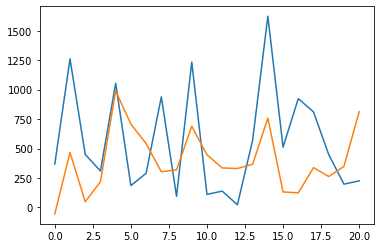

In [ ]:
import matplotlib.pyplot as plt
plt.plot(y_test)
plt.plot(pred)


In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,pred)
print(r2)

-0.09489385898944058


Random Forest Regressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
Regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
Regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=10, random_state=0)

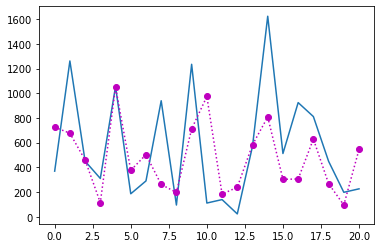

In [ ]:
p = Regressor.predict(X_test)
plt.plot(y_test)
plt.plot(p,'o:m')

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(y_test,p)
print(r2)

0.17724404553498196


Kaplan meier estimator

In [ ]:
!pip install lifelines

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 349 kB 5.3 MB/s 
     |████████████████████████████████| 68 kB 5.4 MB/s 
     |████████████████████████████████| 38.1 MB 31.4 MB/s 
  Created wheel for autograd-gamma: filename=autograd_gamma-0.5.0-py3-none-any.whl size=4048 sha256=90420dddcff8ec8313d2a3b3116ac230c9e736ac59a89a62e0c525fdfc269d12
  Stored in directory: /root/.cache/pip/wheels/9f/01/ee/1331593abb5725ff7d8c1333aee93a50a1c29d6ddda9665c9f
Successfully built autograd-gamma
  Attempting uninstall: scipy
    Found existing installation: scipy 1.4.1
    Uninstalling scipy-1.4.1:
      Successfully uninstalled scipy-1.4.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible

In [ ]:
import lifelines

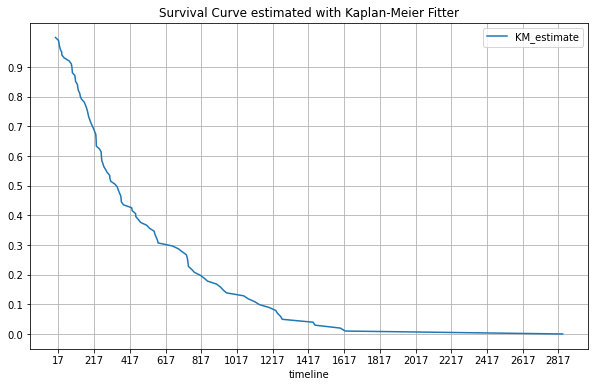

In [ ]:
from lifelines import KaplanMeierFitter

kmf = KaplanMeierFitter()
kmf.fit(durations= DataDummies['timeline'], event_observed = DataDummies['result'])

kmf.survival_function_.plot(figsize=(10,6))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter')
plt.xticks(np.arange(min(DataDummies['timeline']),max(DataDummies['timeline']),200))
plt.yticks(np.arange(0.0,1.0, 0.1))
plt.grid()
plt.show()


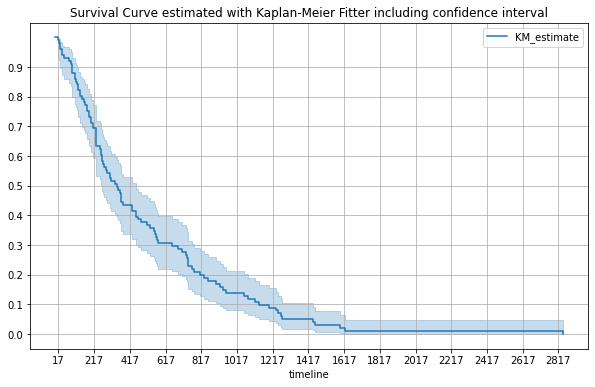

In [ ]:
kmf.plot_survival_function(figsize=(10,6))
plt.title('Survival Curve estimated with Kaplan-Meier Fitter including confidence interval')
plt.xticks(np.arange(min(DataDummies['timeline']),max(DataDummies['timeline']),200))
plt.yticks(np.arange(0.0,1.0, 0.1))
plt.grid()
plt.show()

In [ ]:
kmf.survival_function_

,KM_estimate
timeline,
0.0,1.000000
17.0,0.990099
20.0,0.980198
23.0,0.970297
27.0,0.960396
...,...
1443.0,0.039604
1454.0,0.029703
1596.0,0.019802


Polynomial Regression

In [ ]:
# from sklearn.preprocessing import PolynomialFeatures
# polyreg = PolynomialFeatures(degree=3, include_bias = False)
# X_train = polyreg.fit_transform(X_train.reshape(-1, 1))
# X_poly = polyreg.fit_transform(X_train)
# reg = LinearRegression()
# polyreg.fit(X_poly,y_train)
# pred2array= np.array([[X_test]])
# pred2array = polyreg.fit_transform(pred2array.reshape(-1, 1))
# reg.predict(polyreg.fit_transform(pred2array))

In [ ]:
# acc = cross_val_score(estimator = Regressor, X = X_train, y = y_train, cv = 10)
# print("accuracy : {:.2f}%".format(acc.mean()*100))
# print("standard deviation: {:.2f}%".format(acc.std()*100))

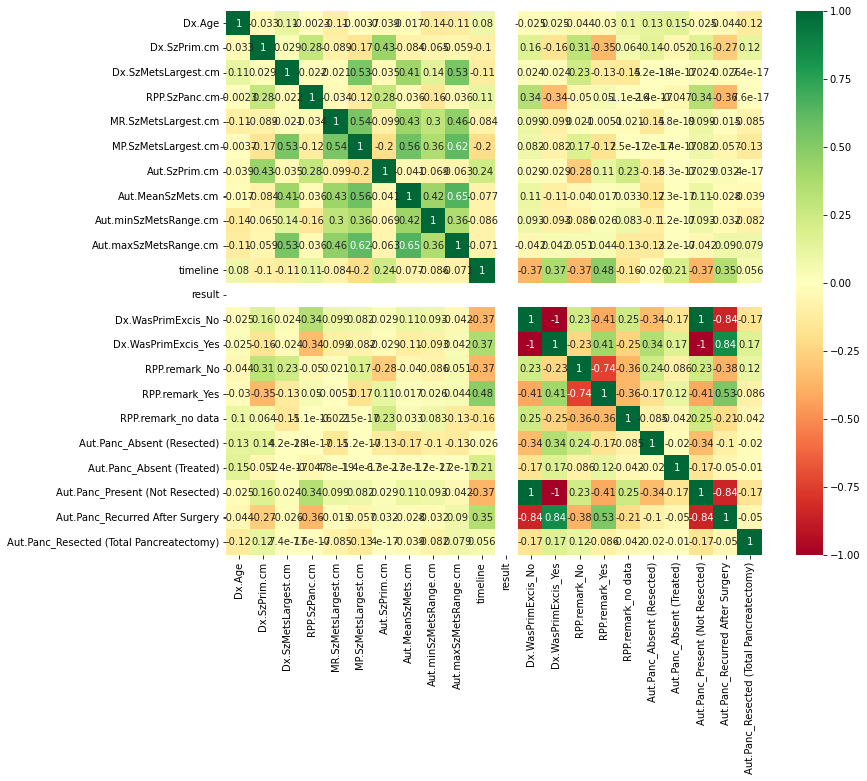

In [ ]:
plt.figure(figsize=(12,10))
p=sns.heatmap(DataDummies.corr(),annot=True,cmap="RdYlGn")

Cox Proportional - Hazards model

In [ ]:
columns_selected = ['Dx.Age','timeline','result', 'RPP.SzPanc.cm', 'Aut.SzPrim.cm', 'Dx.WasPrimExcis_Yes', 'RPP.remark_Yes', 'Aut.Panc_Absent (Treated)', 'Aut.Panc_Recurred After Surgery']
PH_data = DataDummies[columns_selected]

In [ ]:
from lifelines import CoxPHFitter
# Initialize and fit the model
coxph = CoxPHFitter()
coxph.fit(PH_data, duration_col = 'timeline', event_col = 'result')
# Print model summary
coxph.print_summary()


<lifelines.CoxPHFitter: fitted with 101 total observations, 0 right-censored observations>
             duration col = 'timeline'
                event col = 'result'
      baseline estimation = breslow
   number of observations = 101
number of events observed = 101
   partial log-likelihood = -350.39
         time fit was run = 2022-05-29 15:06:20 UTC

---
                                  coef  exp(coef)   se(coef)   coef lower 95%   coef upper 95%  exp(coef) lower 95%  exp(coef) upper 95%
covariate                                                                                                                               
Dx.Age                           -0.01       0.99       0.01            -0.02             0.01                 0.98                 1.01
RPP.SzPanc.cm                     0.02       1.02       0.09            -0.16             0.19                 0.85                 1.21
Aut.SzPrim.cm                    -0.13       0.88       0.06            -0.25            -0.01                 0.78                 0.99
Dx.WasPrimExcis_Yes              -0.79       0.46       0.48            -1.72             0.15                 0.18                 1.17
RPP.remark_Yes                   -0.94       0.39       0.28            -1.48            -0.40                 0.23                 0.67
Aut.Panc_Absent (Treated)        -0.36       0.70       1.16            -2.64             1.91                 0.07                 6.77
Aut.Panc_Recurred After Surgery   0.42       1.52       0.60            -0.76             1.59                 0.47                 4.91

                                  cmp to     z      p   -log2(p)
covariate                                                       
Dx.Age                              0.00 -0.72   0.47       1.08
RPP.SzPanc.cm                       0.00  0.20   0.84       0.24
Aut.SzPrim.cm                       0.00 -2.21   0.03       5.20
Dx.WasPrimExcis_Yes                 0.00 -1.64   0.10       3.31
RPP.remark_Yes                      0.00 -3.39 <0.005      10.46
Aut.Panc_Absent (Treated)           0.00 -0.31   0.75       0.41
Aut.Panc_Recurred After Surgery     0.00  0.69   0.49       1.04
---
Concordance = 0.70
Partial AIC = 714.78
log-likelihood ratio test = 35.92 on 7 df
-log2(p) of ll-ratio test = 17.03

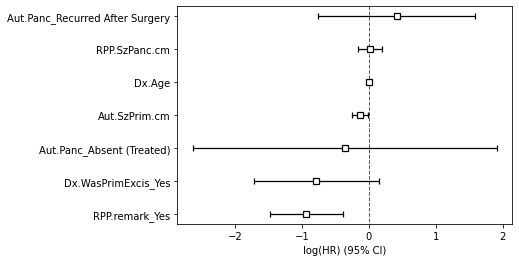

In [ ]:
coxph.plot()

In [ ]:
from lifelines import CoxTimeVaryingFitter

cox_tv = CoxTimeVaryingFitter()
cox_tv.fit(PH_data, event_col= 'timeline', start_col = "start", stop_col = "stop", show_progress=True, step_size=0.1)

KeyError: ignored

In [ ]:
!git remote add origin https://<Yash-2001-code>:<Github67>@github.com/<Yash-2001-code>/PancreaticCancer.git
# !git remote add origin https://<USERNAME>:<Token>@github.com/<USERNAME>/reponame.git

/bin/bash: Yash-2001-code: No such file or directory
